<a href="https://colab.research.google.com/github/hafsamahbub/SkinTech/blob/main/Skin_condition_object_detection_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏗️Import Necessary Libraries
---

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 21.6 MB/s eta 0:00:00


In [ ]:
!pip install squarify

In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# 🗂️Dataset Overview
---

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mumtahenahussain","key":"dfc51381ddcba4ac248b73bc12298a16"}'}

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d hafsamahbub17/object-detection-of-skin

Dataset URL: https://www.kaggle.com/datasets/hafsamahbub17/object-detection-of-skin
License(s): CC-BY-SA-4.0
object-detection-of-skin.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir CSE499
!!unzip /content/object-detection-of-skin.zip -d CSE499

mkdir: cannot create directory ‘CSE499’: File exists


['Archive:  /content/object-detection-of-skin.zip',
 'replace CSE499/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ']

## Visualizing Sample Images with Corresponding Annotations

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/CSE499/train/images"
train_labels = "/content/CSE499/train/labels"

test_images = "/content/CSE499/test/images"
test_labels = "/content/CSE499/test/labels"


# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

NameError: name 'os' is not defined

## Image Metadata

In [ ]:
# Load an image using OpenCV
image = cv2.imread("/content/CSE499/test/images/0000176_jpg.rf.5b2b34560109116a28037bb1bb7798a7.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


# 🚀Model Training
---

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
!cat /content/CSE499/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['Acne', 'Eyebags', 'Wrinkles']

roboflow:
  workspace: skin-condition-detection
  project: skin-condition-detection_merged
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/skin-condition-detection/skin-condition-detection_merged/dataset/1

In [ ]:
model = YOLO('yolov8x.pt') #using best model
# Train the model
results = model.train(data = '/content/CSE499/data.yaml',
            epochs = 5,
            imgsz = height,
            project = '/content/drive/MyDrive/YOLOv8_new',
            save = True,
            seed = 42, #change
            batch = 8,
            workers = 4)



Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/CSE499/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/drive/MyDrive/YOLOv8_new, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

RuntimeError: Dataset '/content/CSE499/data.yaml' error ❌ 
Dataset '/content/CSE499/data.yaml' images not found ⚠️, missing path '/content/CSE499/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

# 📈Model Performance
---
<div style="background-color:#f2f2f2; padding: 20px;">
    
<h2>Train Box Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train box loss metric measures the difference between the predicted bounding boxes and the actual bounding boxes of the objects in the training data. A lower box loss means that the model's predicted bounding boxes more closely align with the actual bounding boxes.</p>
    
<h2>Train Class Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train class loss metric measures the difference between the predicted class probabilities and the actual class labels of the objects in the training data. A lower class loss means that the model's predicted class probabilities more closely align with the actual class labels.</p>

<h2>Train DFL Loss:</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The train DFL (Dynamic Feature Learning) loss metric measures the difference between the predicted feature maps and the actual feature maps of the objects in the training data. A lower DFL loss means that the model's predicted feature maps more closely align with the actual feature maps.</p>
    
<h2>Metrics Precision (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics precision (B) metric measures the proportion of true positive detections among all the predicted bounding boxes. A higher precision means that the model is better at correctly identifying true positive detections and minimizing false positives.</p>
    
<h2>Metrics Recall (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics recall (B) metric measures the proportion of true positive detections among all the actual bounding boxes. A higher recall means that the model is better at correctly identifying all true positive detections and minimizing false negatives.</p>
    
<h2>Metrics mAP50 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50 (B) metric measures the mean average precision of the model across different object categories, with a 50% intersection-over-union (IoU) threshold. A higher mAP50 means that the model is better at accurately detecting and localizing objects across different categories.</p>
    
<h2>Metrics mAP50-95 (B):</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The metrics mAP50-95 (B) metric measures the mean average precision of the model across different object categories, with IoU thresholds ranging from 50% to 95%. A higher mAP50-95 means that the model is better at accurately detecting and localizing objects across different categories with a wider range of IoU thresholds.</p>
</div>

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/YOLOv8 (1)/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


NameError: name 'pd' is not defined

# 📊Evaluation
---

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>mAP Metrics</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Mean Average Precision (mAP) is a popular evaluation metric in object detection, including the YOLO model. It is used to assess the accuracy of an object detection model by measuring how well it can detect objects in an image, as well as the precision of those detections. mAP takes into account both the number of correctly identified objects and the quality of the detections, which means that it is a robust metric for assessing the performance of an object detection model.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">In YOLO, mAP is particularly important because it measures the accuracy of the model in detecting objects of interest. The higher the mAP, the better the model is at identifying objects in an image. Since YOLO is an object detection model designed for real-time applications, achieving high mAP scores is crucial to ensure that the model can accurately detect objects in real-world scenarios. A high mAP score indicates that the model can effectively identify objects and can be used with confidence in real-world applications.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">However, it is worth noting that mAP is not a perfect metric and has its limitations. For example, it does not account for the difficulty of detecting certain types of objects or the importance of different object classes. Nevertheless, it remains a widely used and valuable metric for evaluating object detection models such as YOLO. With its ability to provide a reliable assessment of a model's ability to detect objects, mAP is an essential tool for both researchers and practitioners in the field of computer vision.</p>
</div>

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/drive/MyDrive/YOLOv8 (1)/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'val')

Ultralytics YOLOv8.2.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/499A/test/labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 103, len(boxes) = 6030. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:46<00:00,  1.33s/it]


                   all        548       6030      0.619      0.468       0.55      0.268
                  Acne        548       5417       0.58      0.242       0.39      0.132
               Eyebags        548        107      0.637      0.869       0.77      0.343
              Wrinkles        548        506      0.641      0.292      0.491      0.329
Speed: 0.6ms preprocess, 69.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val


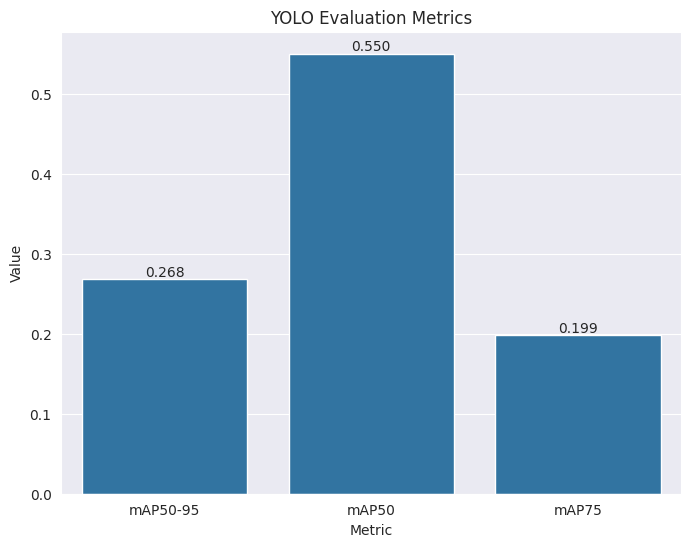

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. In object detection, the confusion matrix can be used to calculate various performance metrics like precision, recall, and F1 score. The confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. In the case of ship detection using YOLO, the confusion matrix can be used to evaluate the model's performance in detecting ships in aerial images.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">The rows of the confusion matrix represent the ground truth labels (i.e., the actual presence or absence of a ship in the image), while the columns represent the predicted labels (i.e., the model's prediction of the presence or absence of a ship). The true positives (TP) represent the cases where the model correctly predicts the presence of a ship, while the true negatives (TN) represent the cases where the model correctly predicts the absence of a ship. The false positives (FP) represent the cases where the model incorrectly predicts the presence of a ship when there is none, while the false negatives (FN) represent the cases where the model incorrectly predicts the absence of a ship when there is one. By looking at these values, we can calculate various performance metrics that can help us evaluate the model's performance.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; ">Overall, the confusion matrix is a useful tool in evaluating the performance of object detection algorithms like YOLO. By using this tool, we can calculate various performance metrics like precision, recall, and F1 score, which can help us understand how well the model is performing in detecting ships in aerial images. This, in turn, can help us improve the model by identifying areas where it is making mistakes and tweaking the model's architecture and parameters accordingly.</p>
</div>

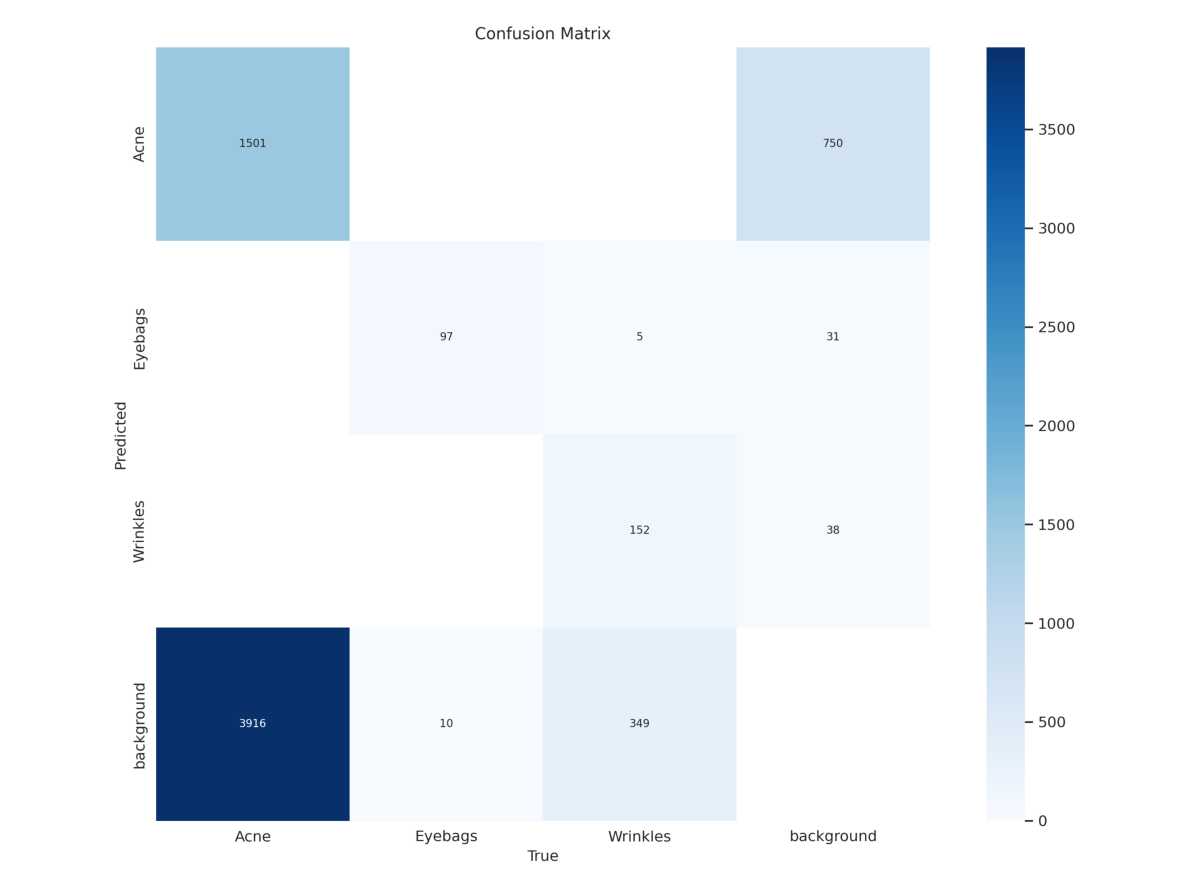

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/drive/MyDrive/YOLOv8 (1)/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# 🔮Making Predictions on Test Images
---

In [ ]:
# Function to perform ship detections
def skin_cond_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 27 Acnes, 87.0ms
Speed: 3.4ms preprocess, 87.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Eyebagss, 59.7ms
Speed: 1.8ms preprocess, 59.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 26 Acnes, 57.6ms
Speed: 2.5ms preprocess, 57.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Eyebagss, 57.4ms
Speed: 3.1ms preprocess, 57.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Acne, 59.3ms
Speed: 2.2ms preprocess, 59.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Eyebagss, 59.3ms
Speed: 2.3ms preprocess, 59.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Wrinkless, 59.4ms
Speed: 2.5ms preprocess, 59.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Acne, 57.5ms
Speed: 2.3ms preprocess, 57.5ms inference, 2.2ms postprocess per image at shape (1, 

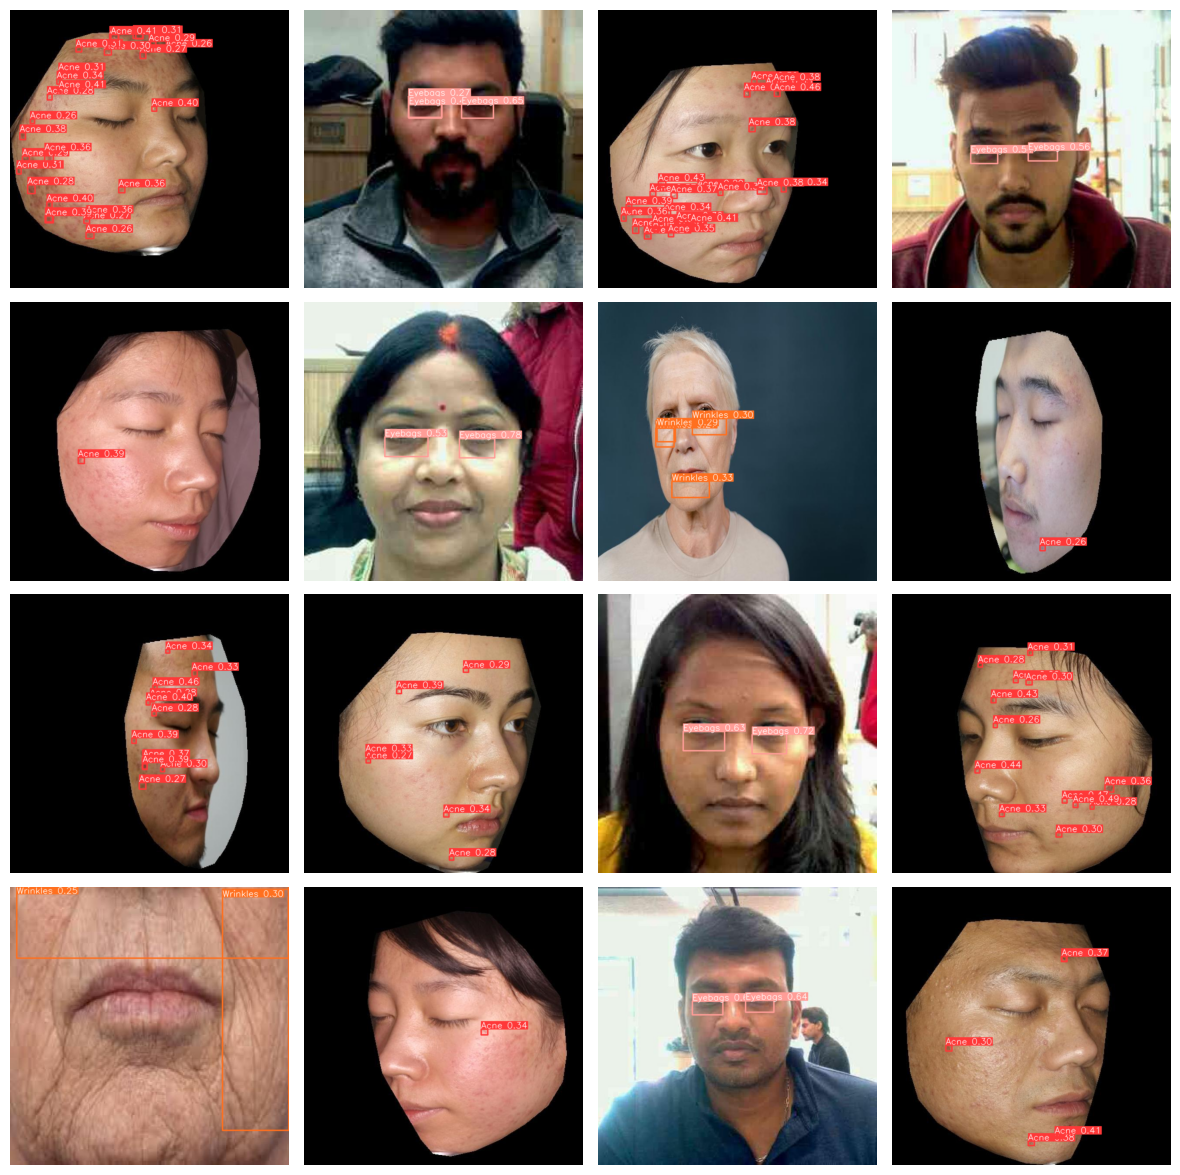

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/499A/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = skin_cond_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
